# Fuel Consumption Prediction
## Using Simple Linear Regression

### Importing needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

**`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

### Reading the data using pandas

In [2]:
df = pd.read_csv("FuelConsumption.csv")

# Take a look at the dataset

df.head(10).T

,0,1,2,3,4,5,6,7,8,9
MODELYEAR,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014
MAKE,ACURA,ACURA,ACURA,ACURA,ACURA,ACURA,ACURA,ACURA,ACURA,ACURA
MODEL,ILX,ILX,ILX HYBRID,MDX 4WD,RDX AWD,RLX,TL,TL AWD,TL AWD,TSX
VEHICLECLASS,COMPACT,COMPACT,COMPACT,SUV - SMALL,SUV - SMALL,MID-SIZE,MID-SIZE,MID-SIZE,MID-SIZE,COMPACT
ENGINESIZE,2.0,2.4,1.5,3.5,3.5,3.5,3.5,3.7,3.7,2.4
CYLINDERS,4,4,4,6,6,6,6,6,6,4
TRANSMISSION,AS5,M6,AV7,AS6,AS6,AS6,AS6,AS6,M6,AS5
FUELTYPE,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z
FUELCONSUMPTION_CITY,9.9,11.2,6.0,12.7,12.1,11.9,11.8,12.8,13.4,10.6
FUELCONSUMPTION_HWY,6.7,7.7,5.8,9.1,8.7,7.7,8.1,9.0,9.5,7.5


### Data Exploration

Let's first have a descriptive exploration on our data

In [3]:
# Summarize the data

df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Selecting key features to explore more
Plot each of these features in bar graphs

   ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244
5         3.5          6                  10.0           230
6         3.5          6                  10.1           232
7         3.7          6                  11.1           255
8         3.7          6                  11.6           267


array([[<Axes: title={'center': 'CYLINDERS'}>]], dtype=object)

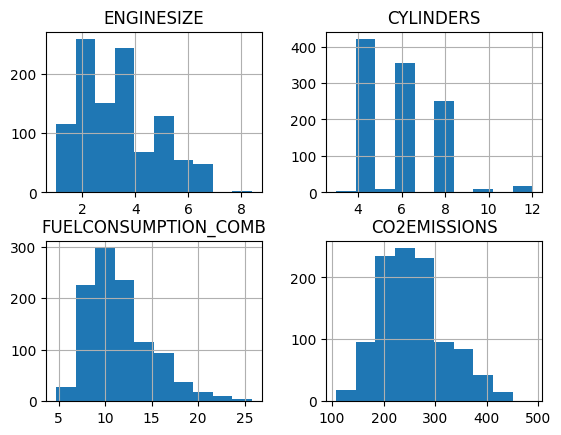

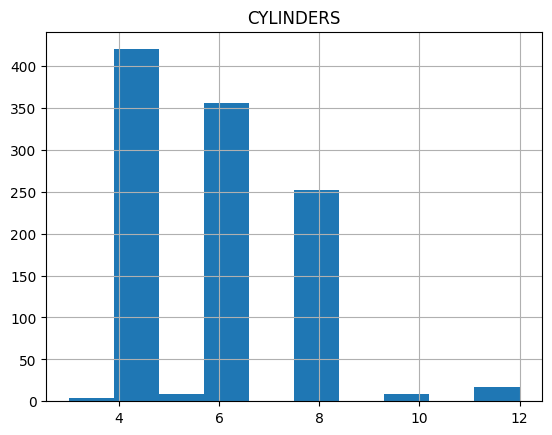

In [4]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
print(cdf.head(9))
cdf.hist()
df[['CYLINDERS']].hist()

### Plot each of these features against the Emission
The main objective is to see how linear their relationship is:

1)FUELCONSUMPTION_COMB & CO2EMISSIONS

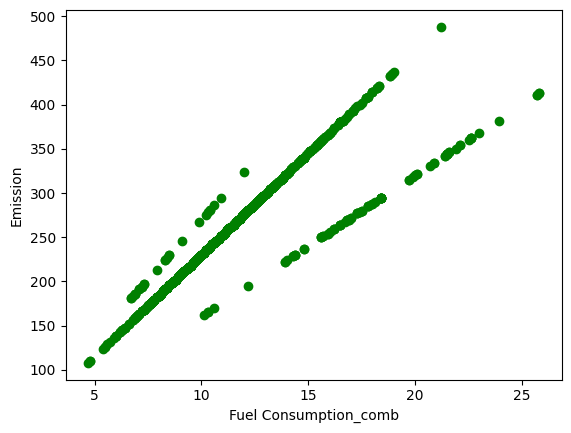

In [5]:
plt.scatter(cdf['FUELCONSUMPTION_COMB'], cdf['CO2EMISSIONS'], color='green')
plt.xlabel("Fuel Consumption_comb")
plt.ylabel("Emission")
plt.show()

2)CYLINDERS & CO2EMISSIONS

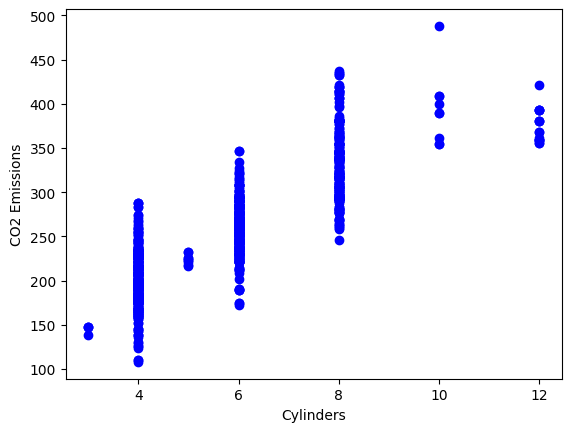

In [7]:
plt.scatter(cdf["CYLINDERS"], cdf['CO2EMISSIONS'], color='blue')
plt.ylabel('CO2 Emissions')
plt.xlabel('Cylinders')
plt.show()

3)Engine Size & CO2 Emissions

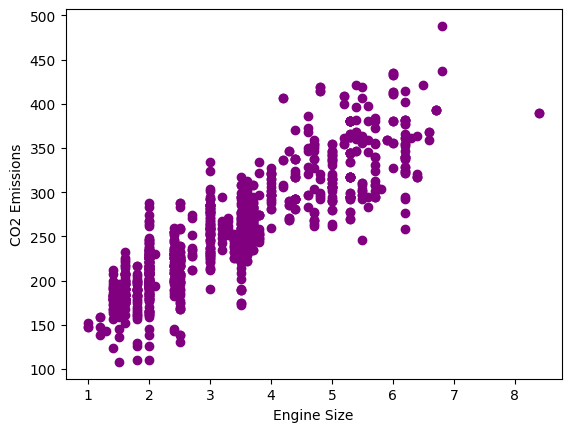

In [9]:
plt.scatter(cdf['ENGINESIZE'], cdf['CO2EMISSIONS'], color='purple')
plt.ylabel("CO2 Emissions")
plt.xlabel("Engine Size")
plt.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using **np.random.rand()** function:

In [10]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

### Train data distribution

Text(0, 0.5, 'Engine Size')

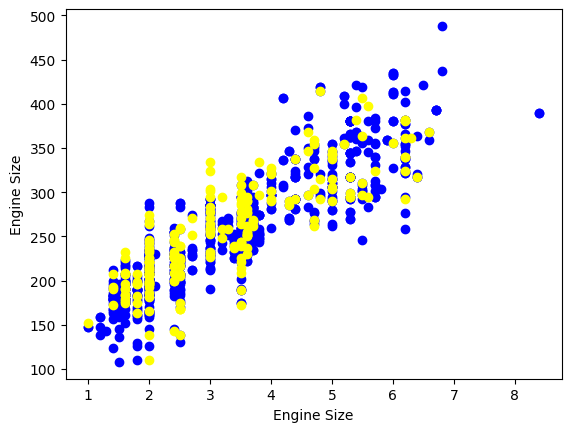

In [13]:
fig = plt.figure()
axes1 = fig.add_subplot()
axes1.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
axes1.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='yellow')
plt.xlabel("Engine Size")
plt.ylabel("Engine Size")

### Modeling
Using sklearn package to model data

In [14]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
linear_regression.fit(train_x, train_y)

print("Coefficients: ", linear_regression.coef_)
print("Intercept: ", linear_regression.intercept_)

Coefficients:  [[39.72690658]]
Intercept:  [122.46712877]


**Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line.
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.
Notice that all of the data must be available to traverse and calculate the parameters.

Text(0, 0.5, 'Emission')

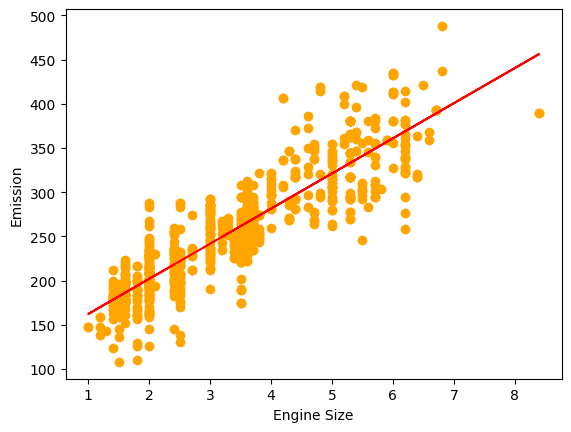

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='orange')
plt.plot(train_x, linear_regression.coef_[0][0]*train_x + linear_regression.intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel("Emission")

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [19]:
from sklearn.metrics import r2_score


test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = linear_regression.predict(test_x)

# print(regr)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 25.45
Residual sum of squares (MSE): 1081.77
R2-score: 0.69
